## Baby Steps into Machine Learning

A real estate manager approached you as a data scientist to become his business patner. All he wants you to do is supply a model that predicts how much various houses are worth.

The major question to ask is **How have you been doing this before now?**

Then He told you, He identifies price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Machine learning works the same way


**A machine learning model** is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

Refer to  this [link](https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a) for an overview of common machine learning models





The first step of capturing patterns from data is called **fitting or training** the model. The data used to fit the model is called the **training data**.

After the model has been fit, you can apply it to new data to predict prices of additional homes.

This notebook is the based on the [House Prices Competition](https://www.kaggle.com/c/home-data-for-ml-course)

**Summary of the Competition Description**

The competition comprises of 79 explanatory variables describing (almost) every aspect of the residential home.
You will find the descriptions [here](https://www.kaggle.com/c/home-data-for-ml-course/data)

The competition challenges you to predict the final price of each house.



### Examine the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Let's import the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Basic Data Exploration

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


This includes 38/81. Showing that 43 other columns are categorical variables
**count** shows how many rows have non-missing values. Showing that only LotFrontage and MasVnrArea are the numeric variables with missing numbers

What are numeric variables?

**mean** calculates the average.
**std** is the standard deviation, which measures how numerically spread out the values are. You will understand that shortly
**min, 25%, 50%, 75% and max values** imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

### Questions
1. What is the average lot size (rounded to nearest integer)?

2. As of today, how old is the oldest and newest home (current year - the date in which it was built)

In [5]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Let us take care of missing values

Note: There are several ways this can be done.
You will learn more about this during the subsequent trainings.
We will use "dropna()" method in this notebook. i.e Drop all non available values


In [6]:
# Get names of columns with missing values
cols_with_missing = [col for col in train.columns
                     if train[col].isna().any()]
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
train = train.dropna(axis = 1)

test = test.dropna(axis = 1)

In [8]:
print(train.shape)
print(test.shape)

(1460, 62)
(1459, 47)


In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
test.isna().sum().any()

False

### Handling Categorical Variables

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first.

In [11]:
Categorical_cols=train.select_dtypes(include='object')
Categorical_cols.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [12]:
print('We have {} categorical columns out of {} total columns'.format(len(Categorical_cols.columns),train.shape[1:]))

We have 27 categorical columns out of (62,) total columns


#### You will learn how to handle these categorical variables in upcoming classes

How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

In [13]:
# Create the list of features based on your intuition first
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
# Select data corresponding to features in feature_names as 
X = train[feature_names]

In [14]:
#Select the prediction target which is the Sale Price column
y = train.SalePrice

In [15]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [16]:
X. describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


### Building the Machine Learning model

Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

**Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

**Fit**: Capture patterns from provided data. This is the heart of modeling.

**Predict**: Just what it sounds like

**Evaluate**: Determine how accurate the model's predictions are.

 We'll start with a model called the Decision Tree. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

In [17]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

# Fit the model
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [18]:
predictions = model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


Did you notice anything? Check again

### Model Validation

Looking through all your predictions and comparing how close each is to the actual values is not advisable.Using a summarized metric will help resolve this.

Model Validation helps you measure the quality of your model to improve your models.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

error=actual−predicted

So, if a house cost #150,000 and you predicted it would cost #100,000 the error is #50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality.

In [19]:
#Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, predictions)

62.35433789954339

#### This is it
**Note:**

Do not make predictions on your train data. 

Lets Examine the effect of predicting on train data 

### Split data into training and validation data, for both features and target

The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.

In [20]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 42)
# Define model
new_model = DecisionTreeRegressor()
# Fit model
new_model.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
# get predicted prices on validation data
val_predictions = new_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

30978.076712328766


This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. 

30738 compared to 62 is a very large difference.

There are many ways to improve this model, such as experimenting to find better features or different model types.

We will get to this in other lessons.

#### Let's try two other models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
Log_model = LogisticRegression(random_state=1)

# Fit the model
Log_model.fit(X, y)
# get predicted prices on validation data
Log_predictions = Log_model.predict(val_x)
print(mean_absolute_error(val_y, Log_predictions))

47026.94794520548


C:\Users\OPEYEMI OSAKUADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
Rf_model = RandomForestRegressor(random_state=1)

# Fit the model
Rf_model.fit(X, y)
# get predicted prices on validation data
Rf_predictions = Rf_model.predict(val_x)
print(mean_absolute_error(val_y, Rf_predictions))

8147.329691193738


*Random Forest performed better than other models as it is an esemble of tree models. 
Hyperparameter tuning will give a better result. You will also learn about this in the upcoming classes.*

Before you go,
Have you heard about Underfitting and Overfitting?

Let's talk about it briefly

### Underfitting and Overfitting



**Overfitting** is when a model matches the training data almost perfectly, but does poorly in validation and other new data. 

When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

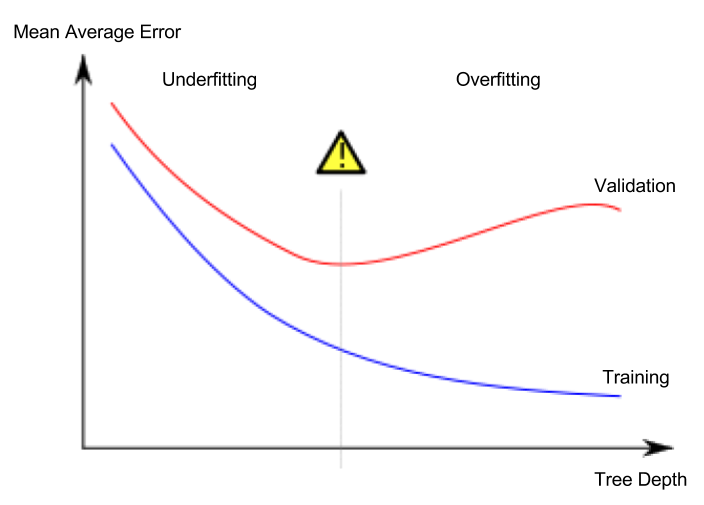

In [25]:
from IPython.display import Image
Image(filename='2q85n9s.png')

For every Machine Learning model, there is a documentation. 

Checking Decision Tree Regressor documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
There are several options to adjust to improve our model. 


### MAKING PREDICTION ON TEST DATA AND SAVING TO A SUBMISSION FILE

In [26]:
test.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


Just as we did on the train set, repeat the same on the test set

In [27]:
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
# Select data corresponding to features in feature_names as 
X_test= test[feature_names]

There are usually no prediction target in test data as this is what we are to predict

In [28]:
# Since Random forest is the best. Let's use it for prediction

# get predicted prices on test data
y_pred = Rf_model.predict(X_test)

What does the submission file look like?


In [29]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


This shows we are only required to provide this for submission.

Therefore, Create a DataFrame with the "Id" from the "test_dataset" and the new predictions "y_pred"

Then, export the dataframe into a csv file using ".to_csv"

In [30]:
pd.DataFrame({"Id": test["Id"], "SalePrice": y_pred}).to_csv("starter-submission.csv", index = False)

In [31]:
#This is our downloaded submission file
starter_submission = pd.read_csv("starter-submission.csv")
starter_submission.head()

,Id,SalePrice
0,1461,122656.58
1,1462,156789.00
2,1463,182959.00
3,1464,178102.00
4,1465,189049.48


### Further Readings:
[Kaggle Learn - Intro to ML](https://www.kaggle.com/learn/intro-to-machine-learning)

[An overview of common machine learning models](https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a)

### Exercise:
Lay your hands on [Housing Prices Competition](https://www.kaggle.com/c/home-data-for-ml-course) and try improving your scores